# Read and plot gridded data from AC-SAF

The script introduces you to opening - browsing the content and making simple plots of an AC-SAF level 3 dataset. 

Level 3 means that dataset is reported on a regular grid.
This implies to aggregate level 2 data from different orbits. In this case these are monthly arrays of concentration. We make use of xarray that is a much useful package to deal with multidimensional gridded datasets. 

As usual, before import the necessary packages and to have them installed. 
Remind: conda install $package$

We'll start by opening up some GOME2 onboard the METOPB satellite and showing an overview of the dataset. The output will be in an array (NO2) that contains the data, the coordinates and the attributes. The dataset is available from the open Atmospheric Composition SAF database https://acsaf.org/offline_access.html

In [37]:
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

In [38]:
data=xr.open_dataset("../AC-SAF_NO2/GOME_NO2_Global_201305_METOPB_DLR_v1.nc")
prod=xr.open_dataset("../AC-SAF_NO2/GOME_NO2_Global_201305_METOPB_DLR_v1.nc", group="PRODUCT")

# Should read it again and associate the array to the data. This is a trick
# Due to the AC-SAF data structure

data["NO2total"]=prod.NO2total

Now in data you have all NO2 observations with the right coordinates. 
Just type data and you can see what you have. You shall see a dataset of NO2 with coordinates longitude and latitude.

In [39]:
data

<xarray.Dataset>
Dimensions:    (latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float64 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    NO2total   (latitude, longitude) float32 ...
Attributes:
    description:  Level 3 NO2 data
    Conventions:  CF-1.6

Now make simple plots using xarray and matplotlib. Longitude and Latitude are directly accessed since they are coordinates of the dataset

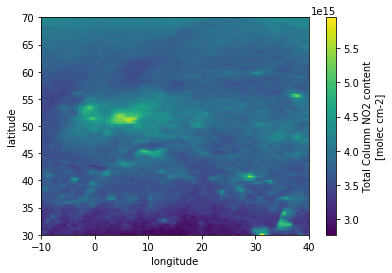

In [40]:
plt_data=data.sel({"latitude": slice(30,70),"longitude": slice(-10,40)})

# This is a selection on latitude and longitude - it is now centered over Europe

%matplotlib inline
plt_data.NO2total.plot()

Now a more tricky map with coastlines - gridlines and the colorbar

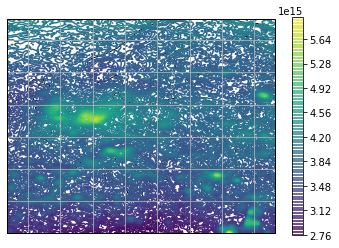

In [41]:
fig=plt.figure
#fig.set_dpi(400)
spl=plt.axes(projection=ccrs.PlateCarree())
plt.contour(plt_data.longitude,plt_data.latitude,plt_data.NO2total,100,transform=ccrs.PlateCarree())
spl.coastlines()
spl.gridlines()
plt.colorbar()

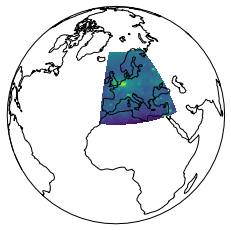

In [46]:
fig=plt.figure()
ax = plt.axes(projection=ccrs.Orthographic(0, 35))
plt.contourf(plt_data.longitude,plt_data.latitude,plt_data.NO2total,100,transform=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

In [48]:
fig.savefig('myAC-SAFL3plot.png', bbox_inches='tight')